# Ejemplo didáctico: Árboles de decisión explicables

*GSDPI 2026, Universidad de Oviedo*

[gsdpi.edv.uniovi.es](https://gsdpi.edv.uniovi.es)

Este notebook muestra cómo generar un dataset sintético sencillo, entrenar un árbol de decisión y extraer reglas legibles para explicar decisiones en clase.

**Objetivos:**
- Entender cómo un `DecisionTreeClassifier` aprende reglas.
- Extraer e interpretar las reglas con `export_text`.
- Proponer ejercicios para consolidar conceptos.

## 1) Librerías e imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text

import sys
print('Python', sys.version.split()[0])
import sklearn
print('scikit-learn', sklearn.__version__)

Python 3.12.7
scikit-learn 1.8.0


## 2) Construcción del dataset (sintético y pedagógico)

La regla conceptual subyacente se puede explicar en clase antes de mostrar el dataset.

In [2]:
import numpy as np

# Columnas: [Edad, Colesterol (mg/dL), Tensión Sistólica (mmHg)]
X = np.array([
    [25, 150, 110], [30, 160, 115], [40, 170, 118], # Jóvenes sanos
    [70, 160, 145], [75, 175, 155],                 # Mayores con riesgo (ajustada tensión)
    [68, 155, 115], [72, 165, 118],                 # Mayores sanos ("Super-agers")
    [45, 245, 120], [50, 260, 130],                 # Mediana edad, colesterol muy alto (Riesgo)
    [55, 200, 135], [60, 205, 145],                 # Transición
    [48, 195, 160], [52, 200, 165],                 # Hipertensos claros
    [30, 220, 130], [40, 230, 135],                 # Colesterol alto en jóvenes (Riesgo moderado)
    [60, 220, 150], [58, 215, 155],                 # Riesgo claro
    [35, 180, 170],                                 # Hipertensión secundaria (Joven pero muy hipertenso)
    [50, 225, 155], [65, 230, 160], [70, 240, 170], # Riesgo alto multifactorial
    [56, 210, 130], [57, 212, 132],                 # Casos frontera (Sanos)
    [68, 215, 148], [62, 218, 152]                  # Casos frontera (Riesgo)
])

# y = 1 (Riesgo Cardiovascular Alto / Intervención requerida)
y = np.array([
    0, 0, 0, # Sanos
    1, 1,    # Riesgo por edad + tensión
    0, 0,    # Sanos (buena tensión pese a edad)
    1, 1,    # Riesgo por colesterol masivo
    0, 1,    # Frontera
    1, 1,    # Riesgo por hipertensión
    0, 0,    # Jóvenes (el colesterol alto solo no siempre es 1 inmediato)
    1, 1,    # Riesgo
    1,       # Riesgo (Urgencia hipertensiva)
    1, 1, 1, # Riesgo claro
    0, 0,    # Frontera controlada
    1, 1     # Riesgo
])

df = pd.DataFrame(X, columns=['edad','colesterol','tension_sistolica'])
df['riesgo'] = y
df.head(30)

,edad,colesterol,tension_sistolica,riesgo
0,25,150,110,0
1,30,160,115,0
2,40,170,118,0
3,70,160,145,1
4,75,175,155,1
5,68,155,115,0
6,72,165,118,0
7,45,245,120,1
8,50,260,130,1
9,55,200,135,0


## 3) Entrenar un árbol de decisión explicable

In [3]:
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, criterion='entropy', random_state=0)
clf.fit(df[['edad','colesterol','tension_sistolica']], df['riesgo'])
print('Árbol entrenado. Profundidad:', clf.get_depth())

Árbol entrenado. Profundidad: 2


## 4) Reglas aprendidas (interpretables)

In [4]:
rules = export_text(clf, feature_names=['edad','colesterol','tension_sistolica'])
print(rules)

|--- tension_sistolica <= 140.00
|   |--- colesterol <= 237.50
|   |   |--- class: 0
|   |--- colesterol >  237.50
|   |   |--- class: 1
|--- tension_sistolica >  140.00
|   |--- class: 1



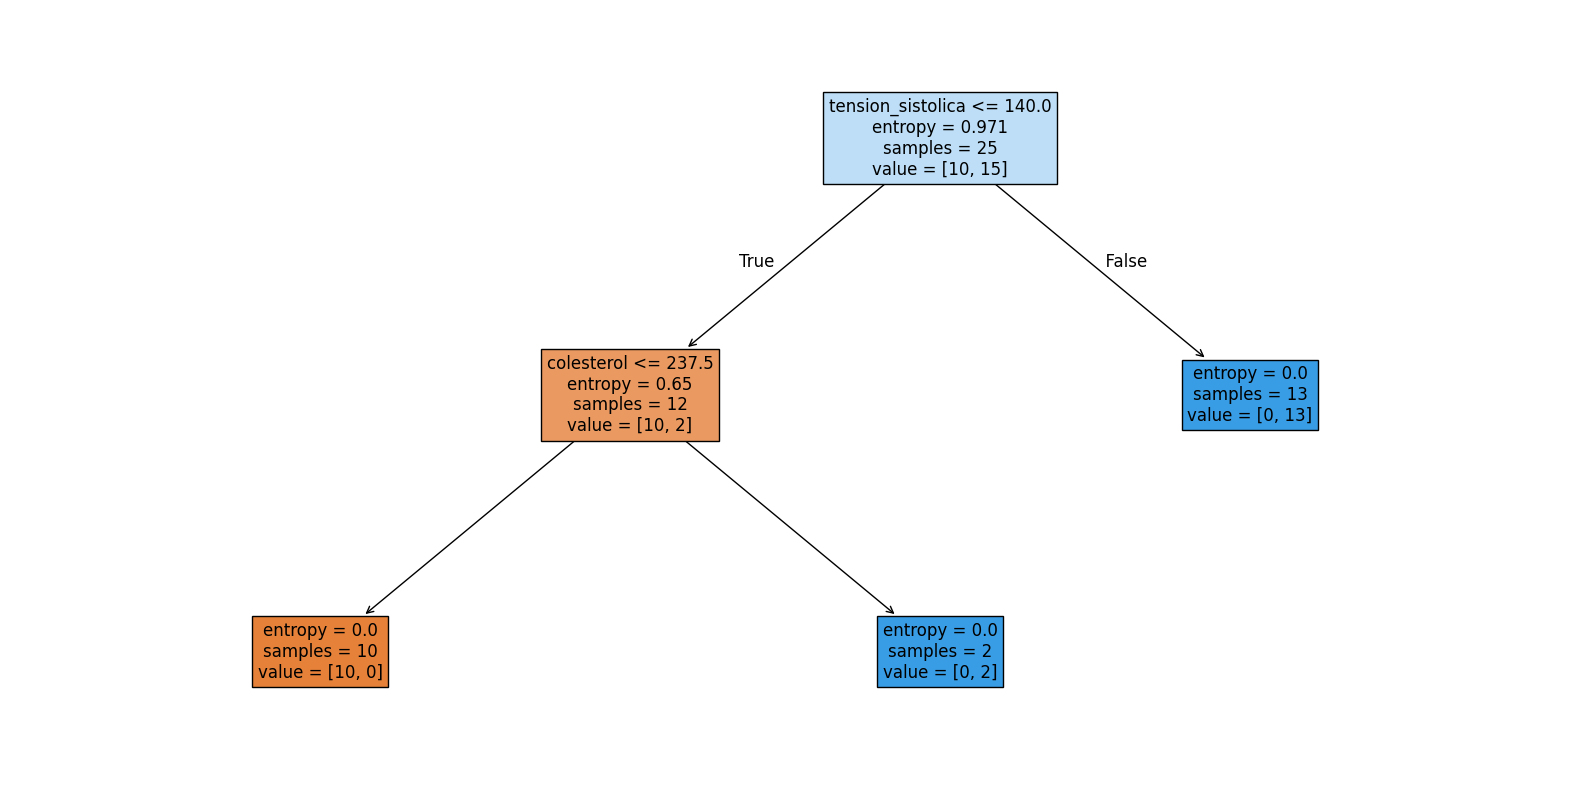

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
h = plot_tree(clf, feature_names=['edad','colesterol','tension_sistolica'],fontsize=12, filled=True)

## 5) Discusión y ejercicios

- Interpretar cada regla: ¿qué combinación de `colesterol` y `tension_sistolica` produce `riesgo=1`?
- Cambiar `max_depth` y observar cómo cambian las reglas.
- Introducir nuevos datos u otro dataset y comparar precisión y complejidad del árbol.